## Import required libraries

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/Users/imc/Desktop/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [5]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [6]:
cur_path

'/Users/imc/Desktop/Traffic_Sign_Recognition'

## Preprocess the images

In [10]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [11]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [14]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [15]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [16]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [19]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [21]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [22]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 70s 71ms/step - loss: 1.8246 - accuracy: 0.5397 - val_loss: 0.5143 - val_accuracy: 0.8656
Epoch 2/20
981/981 [==============================] - 65s 66ms/step - loss: 0.7516 - accuracy: 0.7771 - val_loss: 0.2401 - val_accuracy: 0.9366
Epoch 3/20
981/981 [==============================] - 68s 69ms/step - loss: 0.5006 - accuracy: 0.8531 - val_loss: 0.2996 - val_accuracy: 0.9129
Epoch 4/20
981/981 [==============================] - 65s 66ms/step - loss: 0.3978 - accuracy: 0.8842 - val_loss: 0.1374 - val_accuracy: 0.9642
Epoch 5/20
981/981 [==============================] - 63s 65ms/step - loss: 0.3317 - accuracy: 0.9039 - val_loss: 0.0884 - val_accuracy: 0.9753
Epoch 6/20
981/981 [==============================] - 64s 66ms/step - loss: 0.3103 - accuracy: 0.9126 - val_loss: 0.1001 - val_accuracy: 0.9711
Epoch 7/20
981/981 [==============================] - 64s 66ms/step - loss: 0.2980 - accuracy: 0.9166 - val_loss: 0.1064 - val_accuracy:

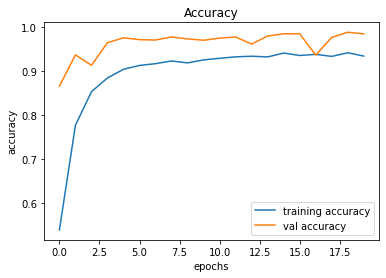

In [24]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

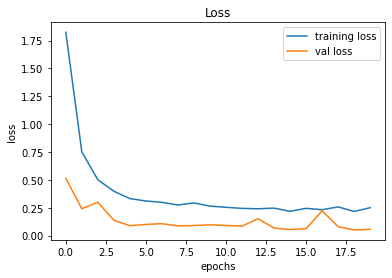

In [25]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [48]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [49]:
X_test, label = testing('Test.csv')

In [50]:
#Y_pred = model.predict_classes(X_test)
#Y_pred
Y_pred = np.argmax(model.predict(X_test),axis=1)
Y_pred

395/395 [==============================] - 5s 14ms/step


array([16,  1, 38, ...,  5,  7, 10])

## Accuracy with the test data

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9592240696753761


## Save the model

In [53]:
model.save("./training/RoadSigns.h5")

## Load the Model

In [55]:
import os
os.chdir(r'/Users/imc/Desktop/Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/RoadSigns.h5')

In [56]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [59]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test),axis=1)
    return image,Y_pred

1/1 [==============================] - 0s 37ms/step
Predicted traffic sign is:  Speed limit (70km/h)


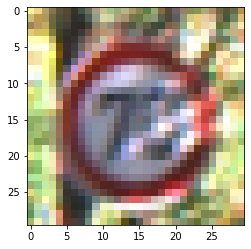

In [63]:
plot,prediction = test_on_img(r'/Users/imc/Desktop/Traffic_Sign_Recognition/Test/00014.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()